In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats
from scipy.stats import norm
from IPython.display import HTML, display

In [12]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">Mostra/Nascondi celle</a>.''')

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
# Valentina Guarino, mat. 978477

## <span style="color:red">  ESERCITAZIONE 1</span>

### Introduzione teorica

#### Generatori lineari congruenziali di numeri pseudorandom

Il generatore lineare congruenziale è un generatore di numeri interi pseudo-random definito ricorsivamente come

$$ i_{n+1} = (a \cdot i_{n} + c) mod(m) $$

dove _a_ è detto **moltiplicatore**, _c_ è l'**incremento**, _m_ il **modulo** e l'operazione di _modulo_ "mod" restituisce il resto della divisione tra $(a \cdot i_{n} + c)$ e $m$. Il valore iniziale $i_{0}$ inoltre è detto _seme_ del generatore.
Ci sono alcuni problemi legati ad un generatore lineare congruenziale:

- _**Lunghezza della sequenza**_: poiché il numero random più grande che può essere prodotto è pari ad $m-1$, allora la lunghezza massima della sequenza generata contenente numeri random diversi tra loro è pari ad $m$, il cui valore massimo equivale al valore massimo che il computer può memorizzare come intero. Per computer da 64 bit allora il valore massimo è pari ad $m = 2^{64}$. Scegliendo tale valore di $m$ tuttavia la sequenza generata darà dei risultati insoddisfacenti. In realtà $m$ dà solo un limite superiore alla lunghezza della sequenza, la quale dipende dalla scelta dei valori delle costanti _a_ e _c_.

- _**Correlazioni nascoste**_: raggruppando i numeri generati in gruppi di $k$ numeri, ogni gruppo può esser visto come coordinate di punti in uno spazio k-dimensionale. I punti generati sono costretti a giacere in un'iperpiano che ha codimensione 1 nello spazio; ci sono pertanto delle correlazioni tra i numeri della sequenza, seppur queste non siano direttamente visibili. Sono state implementate tecniche di shuffle dei numeri generati per ovviare al problema delle correlazioni nascoste. ![SegmentLocal](hyperplane.gif "hyperplane")

Un numero random _reale_ si può ottenere da un generatore lineare congruenziale tramite

$$r_{n} = \frac{i_{n}}{m} , \quad r_{n} \in (0,1]$$

#### Metodo a blocchi

Il metodo a blocchi per le incertezze statistiche è un metodo utilizzato per eliminare l'effetto delle cosidette _nuisance variables_, ovvero di variabili che pur influenzando il risultato non sono di importanza primaria; in particolare, utilizzando il metodo a blocchi con blocchi sufficientemente larghi, viene soppressa l'eventuale dipendenza statistica tra le variabili. Se $A$ è il valore di una variabile ottenuta dopo $M$ passi di una simulazione di tipo MonteCarlo, nella quale vengono utilizzati numeri pseudo-random e metodi stocastici, si possono dividere i passi totali della simulazione in $N$ blocchi, $N < M$, ognuno di lunghezza $L$. In ogni blocco, di lunghezza $L = \frac{M}{N}$, viene ottenuta una stima $A_{i},  i=1,...,N$ della variabile $A$; ho allora che

$$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$

Poiché la varianza della distribuzione può essere calcolata come

$$\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $$

si ottiene un valore della deviazione standard 

 $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$

Dunque durante le simulazioni si avranno, per ogni blocco, la media e la varianza della variabile considerata: su queste verrà effettuata l'analisi statistica, valutando le medie e le varianze cumulative al variare dei blocchi

$$ \langle A \rangle_{cum} = \frac{\langle A \rangle}{i}, \quad i = 1,...,N $$

$$ \langle A^2 \rangle_{cum} = \frac{\langle A^2 \rangle}{i}, \quad i = 1,...,N $$

$$ \langle \sigma \rangle_{cum} = \frac{\langle \sigma \rangle}{i}, \quad i = 1,...,N $$

$$ \langle \sigma^2 \rangle_{cum} = \frac{\langle \sigma^2 \rangle}{i}, \quad i = 1,...,N $$

e valutando su di esse la deviazione standard come

$$
\sigma = \sqrt{\frac{\langle A^2 \rangle_{cum} - (\langle A \rangle_{cum})^2}{i - 1}}, \quad i = 1,...,N
$$

$$
\sigma_{var} = \sqrt{\frac{\langle \sigma^2 \rangle_{cum} - (\langle \sigma \rangle_{cum})^2}{i - 1}}, \quad i = 1,...,N
$$

### Esercizio 1.01: calcolo della media, della varianza e del $\chi^2$

Nella simulazione fatta si sono generati $10^4$ numeri casuali scelti partendo da una distribuzione uniforme tra $[0,1]$: l'obiettivo della simulazione è quello di verificare la bontà del generatore di numeri casuali utilizzato, confrontando i valori ottenuti per le medie e per la varianza (con i relativi errori) con i valori attesi per una distribuzione uniforme.

Pur se statisticamente indipendenti tra loro, i numeri sono stati generati utilizzando il metodo a blocchi per le incertezze statistiche; si sono dunque calcolate le medie cumulative e le deviazioni standard ad esse associate per ogni blocco.

#### Calcolo della media
Come si può vedere dai grafici, le medie cumulative all'aumentare dei blocchi sono compatibili entro circa il valore di $1\sigma$ con il valore esatto che ci si aspetta per dei numeri generati da una distribuzione uniforme, ovvero $\langle r \rangle = \int_0^1 r dr = 1/2$. Si vede inoltre come l'errore associato alla misura diminuisca all'aumentare dei valori generati: questo andamento è quello che ci si aspetta per delle incertezze statistiche generate tramite metodo a blocchi. 

Si è inoltre testato il generatore di numeri casuali con due semi iniziali diversi, per valutare il variare della convergenza al valore esatto al variare del seme; come primo seme è stato utilizzato il $seed.in$ del generatore di numeri casuali utilizzato, mentre come secondo seme è stato usato il $seed.out$ prodotto dopo la prima simulazione. Questo, in base 4096, equivale a $seed =$ 32 1734 1668 65. 

Il variare della convergenza del risultato al variare del seme è dovuto alla natura stocastica del problema.

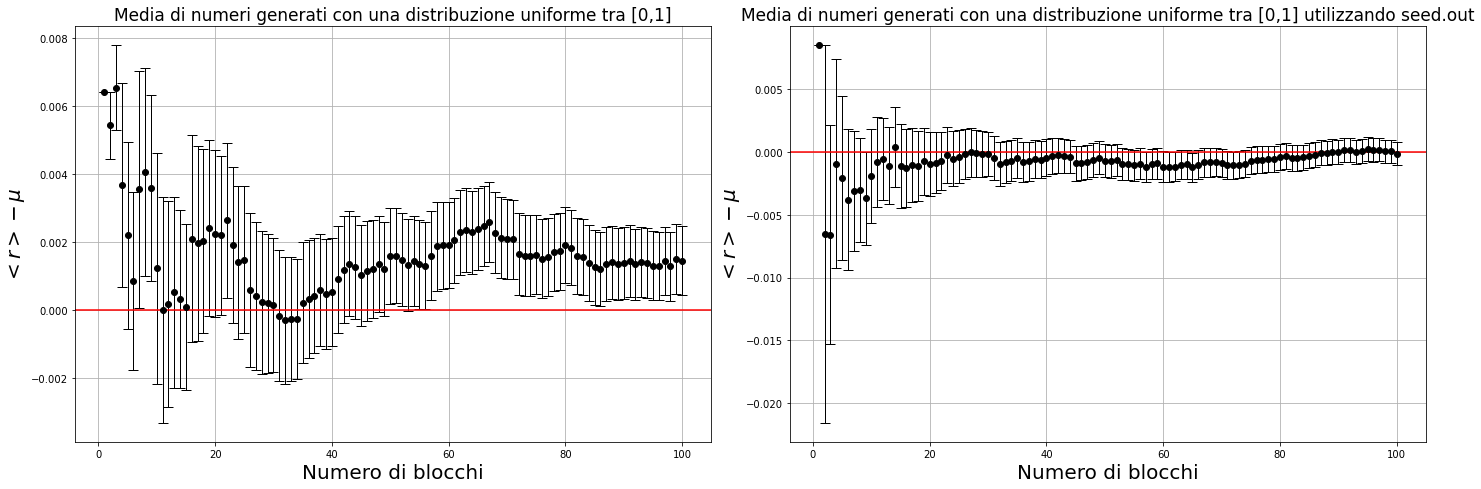

In [3]:
plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
#Plot della media con seme iniziale seed.in
N, cumavr, std = np.loadtxt("Esercizio 1.01/Risultati/outavr.dat", usecols=(0,1,2), unpack=True)
plt.errorbar(N,cumavr-0.5,yerr=std, fmt = "ko", capsize = 5, elinewidth = 1)
plt.title("Media di numeri generati con una distribuzione uniforme tra [0,1]", fontsize = 17)
plt.axhline(y=0,color="red")
plt.xlabel("Numero di blocchi", fontsize = 20)
plt.ylabel("$<r>-\mu$", fontsize = 20)
plt.grid(True)

plt.subplot(2,2,2)
#Plot della media con seme iniziale seed.out
N1, cumavr1, std1 = np.loadtxt("Esercizio 1.01/Risultati/outavr2.dat", usecols=(0,1,2), unpack=True)
plt.errorbar(N1,cumavr1-0.5,yerr=std1, fmt = "ko", capsize = 5, elinewidth = 1)
plt.title("Media di numeri generati con una distribuzione uniforme tra [0,1] utilizzando seed.out", fontsize = 17)
plt.axhline(y=0,color="red")
plt.xlabel("Numero di blocchi", fontsize = 20)
plt.ylabel("$<r>-\mu$", fontsize = 20)
plt.grid(True)

plt.tight_layout()
plt.subplots_adjust(top=0.7,hspace=0.4)
plt.show()

#### Calcolo della varianza
Come nel caso della media, si è fatta una simulazione con il metodo a blocchi per valutare la varianza dei numeri generati in modo casuale, valutando la convergenza al valore atteso per una distribuzione uniforme, $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$.

Anche nel caso della varianza i valori generati convergono ai valori attesi entro circa $1\sigma$.

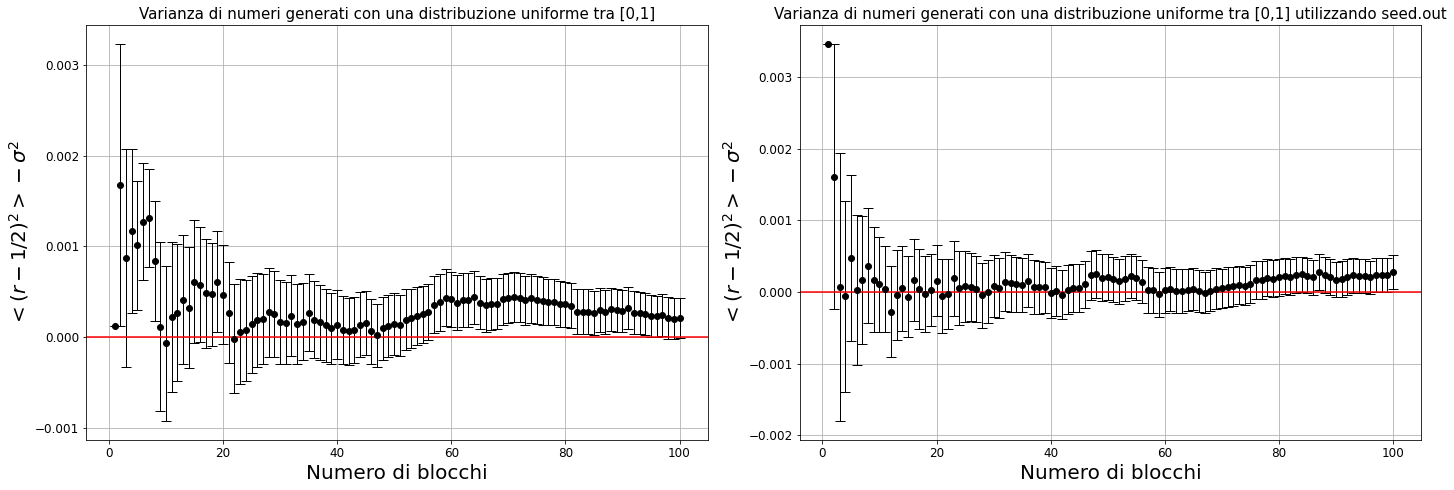

In [32]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
#Plot della varianza con seme iniziale seed.in
N, cumvar, std = np.loadtxt("Esercizio 1.01/Risultati/outvar.dat", usecols=(0,1,2), unpack=True)
plt.errorbar(N,cumvar-1/12,yerr=std, fmt = "ko", capsize = 5, elinewidth = 1)
plt.title("Varianza di numeri generati con una distribuzione uniforme tra [0,1]", fontsize = 15)
plt.axhline(y=0,color="red")
plt.xlabel("Numero di blocchi", fontsize = 20)
plt.ylabel("$<(r-1/2)^2>-\sigma^2$", fontsize = 20)
plt.grid(True)

plt.subplot(2,2,2)
#Plot della varianza con seme iniziale seed.out
N1, cumvar1, std1 = np.loadtxt("Esercizio 1.01/Risultati/outvar2.dat", usecols=(0,1,2), unpack=True)
plt.errorbar(N1,cumvar1-1/12,yerr=std1, fmt = "ko", capsize = 5, elinewidth = 1)
plt.title("Varianza di numeri generati con una distribuzione uniforme tra [0,1] utilizzando seed.out", fontsize = 15)
plt.axhline(y=0,color="red")
plt.xlabel("Numero di blocchi", fontsize = 20)
plt.ylabel("$<(r-1/2)^2>-\sigma^2$", fontsize = 20)
plt.grid(True)

plt.tight_layout()
plt.subplots_adjust(top=0.7,hspace=0.4)
plt.show()

#### Calcolo del $\chi^2$
##### Test di Pearson
Si vuole valutare la probabilità che i numeri casuali generati $r$ non siano estratti da una distribuzione uniforme tramite test del $\chi^2$. Il test del $\chi^2$ è una misura dell'errore tra le osservabili generate nella simulazione e i valori attesi:

$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$

Dividendo l'intervallo $[0,1]$ in 100 sottointervalli, sono stati effettuati 100 esperimenti diversi, in ognuno dei quali sono stati generati $10^4$ numeri casuali valutando quanti ne cadessero in ogni sottointervallo. Per una distribuzione uniforme, il valore atteso $E_i$ dopo $n$ lanci è pari a $np = n \cdot \frac{1}{M} = \frac{n}{M}$ per cui

$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$

dove $n = 10^4$ numeri pseudo-random e $M = 10^2$.

Poiché in media ci si aspetta che $(n_i - n/M)^2 \simeq n/M$, il valore del $\chi^2$ sarà pari al numero di sottointervalli, ovvero $\chi^2 \simeq 100$. I gradi di libertà del $\chi^2$ sono pari in questo a caso a $d.o.f = \frac{n}{M} = 100$.

Eseguendo la simulazione si può notare come i valori campionati del $\chi^2$ oscillino attorno al valore atteso $\chi^2 = 100$. Le oscillazioni che si osservano sono conformi a quelle che si avrebbero per una distribuzione teorica del $\chi^2$ con $k = 100$ gradi di libertà.

Come per le valutazioni precedenti, il test è stato effettuato per diversi semi iniziali del generatore.

Come si evince dal confronto dell'istogramma dei valori sperimentali con la distribuzione teorica del $\chi^2$ con $k = 100$ gradi di libertà, i valori seguono correttamente la distribuzione teorica e pertanto il generatore di numeri pseudo-random riesce a campionare correttamente la distribuzione uniforme.

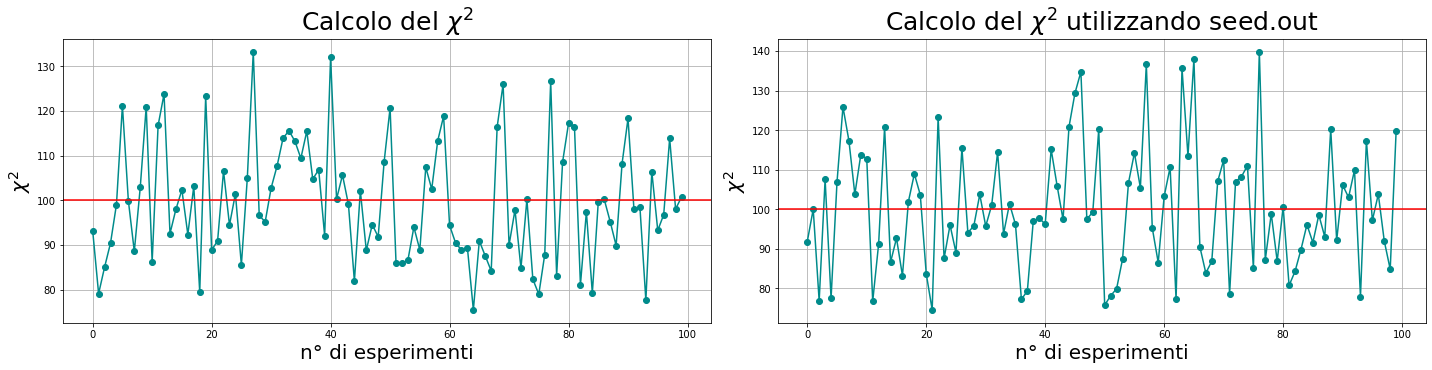

In [54]:
plt.figure(figsize=(20, 25))

plt.subplot(2,2,1)
#Plot del chi quadro con seme seed.in
tries, chi2 = np.loadtxt("Esercizio 1.01/Risultati/outchi.dat", usecols=(0,1), unpack=True)
plt.plot(tries,chi2,marker="o", color = 'darkcyan')
plt.axhline(y=100,color="red")
plt.title("Calcolo del $\chi^2$", fontsize = 25)
plt.xlabel("n° di esperimenti", fontsize = 20)
plt.ylabel("$\chi^2$", fontsize = 20)
plt.grid(True)

plt.subplot(2,2,2)
#Plot del chi quadro con seme seed.out
tries_1, chi2_1 = np.loadtxt("Esercizio 1.01/Risultati/outchi2.dat", usecols=(0,1), unpack=True)
plt.plot(tries_1,chi2_1,marker="o", color = 'darkcyan')
plt.axhline(y=100,color="red")
plt.title("Calcolo del $\chi^2$ utilizzando seed.out", fontsize = 25)
plt.xlabel("n° di esperimenti", fontsize = 20)
plt.ylabel("$\chi^2$", fontsize = 20)
plt.grid(True)

plt.tight_layout()
plt.subplots_adjust(top=0.4,hspace=0.5)

plt.show()

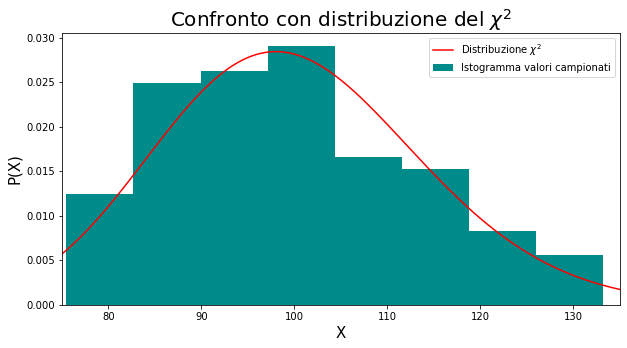

In [70]:
plt.figure(figsize=(10,5))
x = np.linspace(70,140,201)
def showDistribution(d1, tTxt, xTxt, yTxt, xmin, xmax, color):
    '''Utility function to show the distributions, and add labels and title.'''
    plt.plot(x, d1.pdf(x), color=color, label = "Distribuzione $\chi^2$")
    plt.xlim(xmin, xmax)
    plt.title(tTxt, fontsize = 20)
    plt.xlabel(xTxt, fontsize = 15)
    plt.ylabel(yTxt, fontsize = 15)
    plt.legend(loc = "best")
    plt.show()  
    
tries, chi2 = np.loadtxt("Esercizio 1.01/Risultati/outchi.dat", usecols=(0,1), unpack=True)
plt.hist(chi2, bins = 'auto', density = True, histtype = 'stepfilled', color = 'darkcyan', label = "Istogramma valori campionati")
k=100
chi=stats.chi2(k)
showDistribution(chi,'Confronto con distribuzione del 'r"$\chi^2$", 'X', 'P(X)', 75 ,135, 'red')

plt.show()

### Esercizio 1.02: verifica del Teorema del Limite Centrale

#### Teorema del Limite Centrale 

Siano $x_1,...,x_N$ $N$ variabili random _indipendenti_ e _identicamente distribuite_, tali che la loro distribuzione di probabilità congiunta 

$$p(x_1,x_2,...,x_N) = p(x_1)p(x_2)\cdot...\cdot p(x_N)$$

Siano inoltre definiti i primi due momenti della distribuzione:
$$\mu = \langle x_1 \rangle = ... = \langle x_N \rangle$$
$$\sigma^2 = \langle x_1^2 \rangle - \langle x_1 \rangle^2 = ... = \langle x_N^2 \rangle - \langle x_N \rangle^2 < +\infty$$

Data $A_N = \frac{1}{N}\sum_{n=1}^N x_n$, si ha che
- $\mu = \langle A_N \rangle$
- $\sigma_{A_N}^2 = \frac{\sigma^2}{N}$
- $P_{N}(A_{N}) \longrightarrow \frac{1}{2 \pi \sigma_{A_{N}}^2} e^{-\frac{(A_{N}-\mu)^2}{2\sigma_{A_N}^2}}, \quad N \rightarrow +\infty$

Pertanto per variabili $x_N$ definite come sopra per le quali siano definiti finiti i primi due momenti della distribuzione, la loro media per valori $N \rightarrow +\infty$ è distribuita secondo una distribuzione di probabilità gaussiana.

#### Esercizio 1.02
Si è modificato il generatore di numeri casuali utilizzato nell'esercizio 1.01, abilitando il campionamento di numeri casuali partendo da una distribuzione di tipo *esponenziale*, $p(x) = \lambda e^{-\lambda x}$ con $x\in [0;+\infty)$, e da una distribuzione di *Cauchy-Lorentz*, $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$ con $x\in (-\infty;+\infty)$. 

Data la _funzione di distribuzione cumulativa_ 

$$s = F(x) = \int_{-\infty}^x p(x') dx'$$

con $s \in [0,1]$ generato da una distribuzione uniforme, grazie al metodo dell'inversione della funzione cumulativa si sono potuti generare numeri casuali $x = F_x^{-1}(s)$ distribuiti secondo le due distribuzioni da campionare:

- Per la distribuzione esponenziale $x = -\frac{1}{\lambda} \cdot \log(1-s)$

- Per la distribuzione di Cauchy-Lorentz $x = \Gamma \cdot \tan(\pi (s - \frac{1}{2}))$

Si sono impostati valori di $\Gamma = 1$,$\lambda = 1$ e $\mu = 0$.

Generando valori $x_i$ da una distribuzione uniforme e da una distribuzione esponenziale e valutandone la somma, $S_N = \frac{1}{N}\sum_{i=1}^N x_i$, si ha che entrambe le distribuzioni convergono ad una gaussiana all'aumentare di $N$. La distribuzione gaussiana è, difatti, un attrattore nello spazio funzionale delle distribuzioni di probabilità per le distribuzioni uniforme ed esponenziale, le quali soddisfano i requisiti richiesti dal Teorema del Limite Centrale, ovvero l'esistenza e la finitezza dei primi due momenti. 

In particolare, scegliendo come valori $N=1, 2, 10, 100$ e riempiendo degli istogrammi con $10^4$ realizzazioni della variabile somma $S_N$ si ottengono i seguenti risultati:

Parametri del fit gaussiano per una distribuzione uniforme con N=100:
mu =  0.5000108001
sigma =  0.029037794697737294


Parametri del fit gaussiano per una distribuzione esponenziale con N=100:
mu =  0.9998264965999999
sigma =  0.09851158906206817


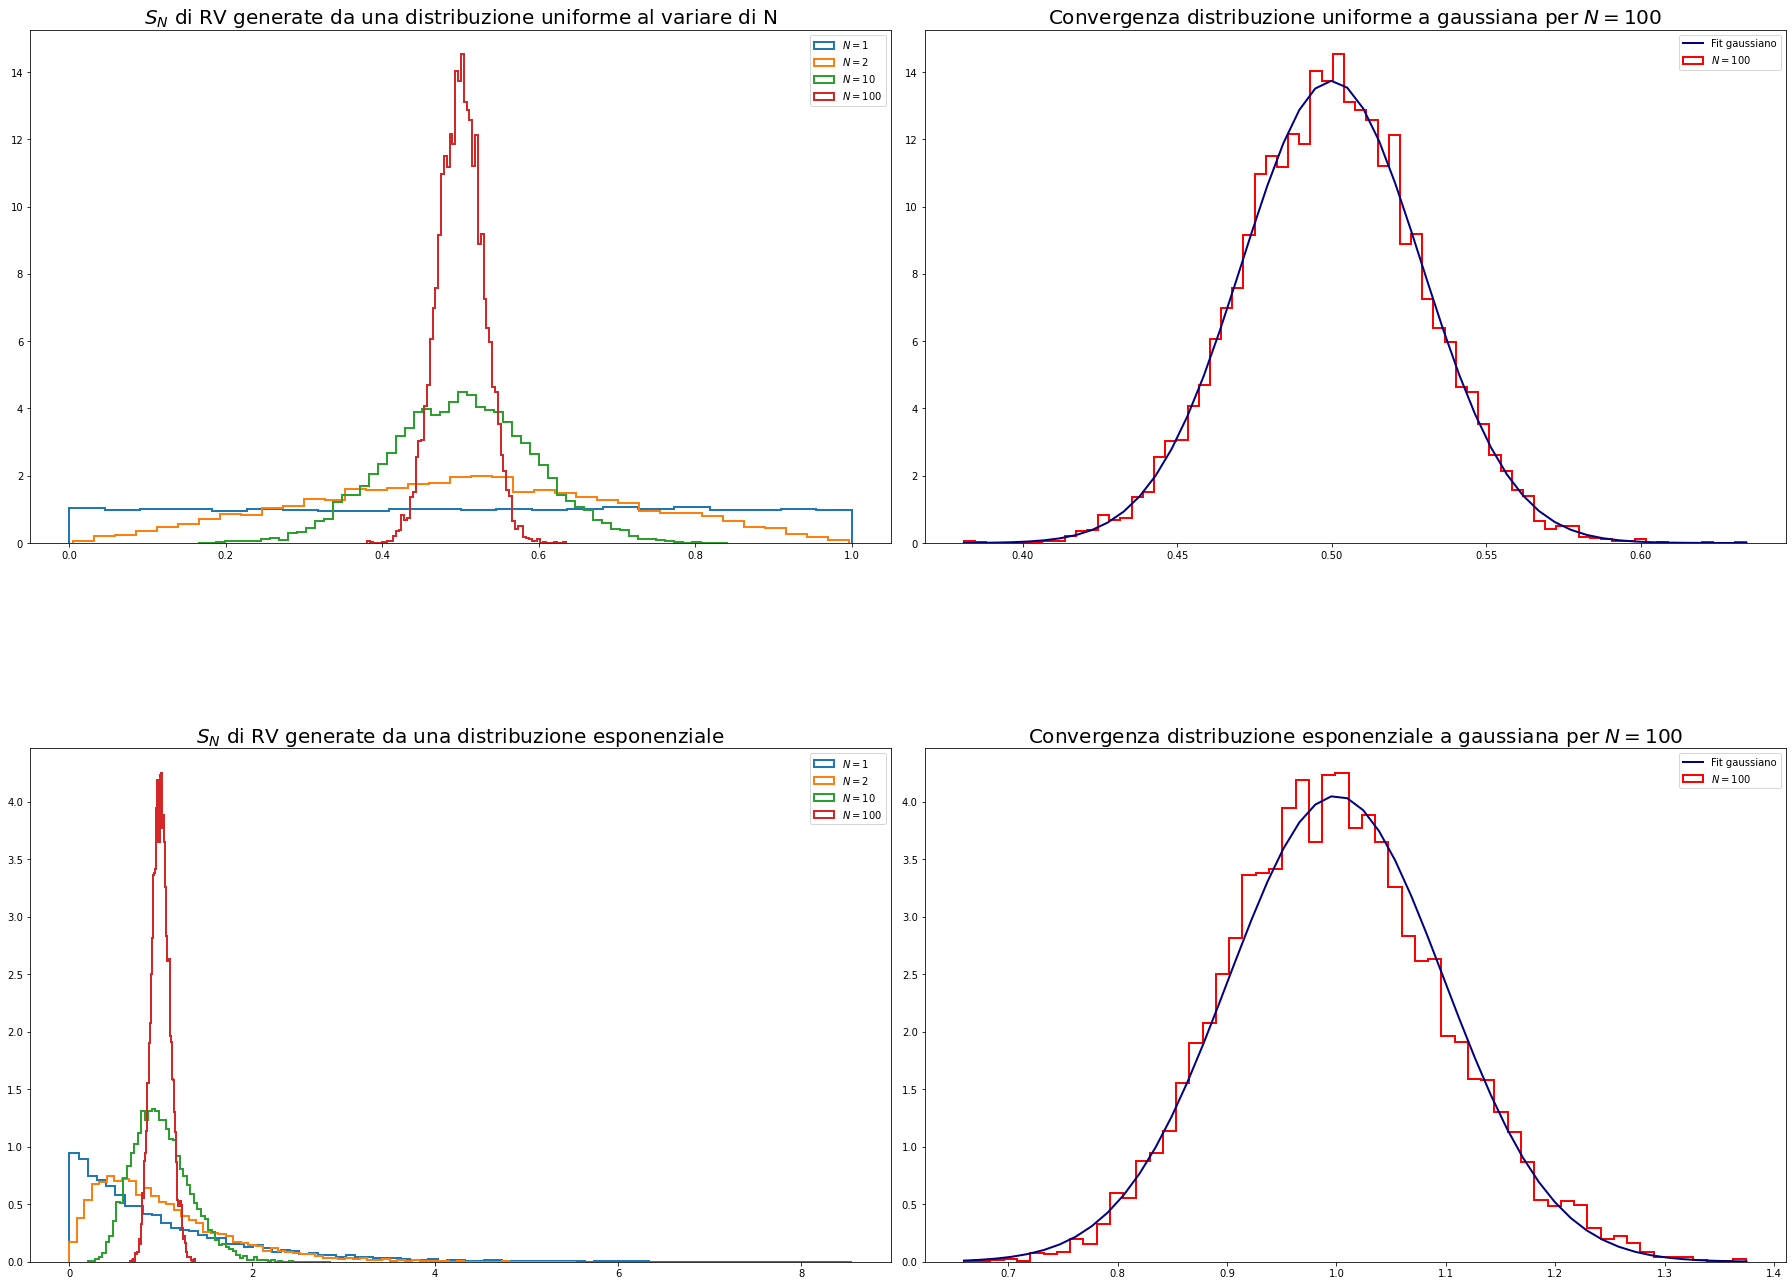

In [10]:
plt.figure(figsize=(25,25))
plt.subplot(2,2,1)
#Distribuzione uniforme: Caricamento dei dati relativi a diversi N
unif = np.loadtxt("Esercizio 1.02/Risultati/unif_out.dat", max_rows = 1, unpack=True)
unif2 = np.loadtxt("Esercizio 1.02/Risultati/unif_out.dat", skiprows = 1, max_rows = 1, unpack=True)
unif10 = np.loadtxt("Esercizio 1.02/Risultati/unif_out.dat", skiprows = 2, max_rows = 1, unpack=True)
unif100 = np.loadtxt("Esercizio 1.02/Risultati/unif_out.dat", skiprows = 3, max_rows = 1, unpack=True)
xmin = np.min(unif100)
xmax = np.max(unif100)
data = np.linspace(xmin, xmax)
#Distribuzione uniforme: Generazione degli istogrammi
plt.hist(unif, bins='auto', density = True, label='$N=1$', histtype = 'step', linewidth=2)
plt.hist(unif2, bins='auto', density = True, label='$N=2$', histtype = 'step', linewidth=2)
plt.hist(unif10, bins='auto', density = True,label='$N=10$', histtype = 'step', linewidth=2)
plt.hist(unif100, bins='auto', density = True, label='$N=100$', histtype = 'step', linewidth=2)
plt.legend(loc = "best")
plt.title('$S_N$ di RV generate da una distribuzione uniforme al variare di N', fontsize = 20)

plt.subplot(2,2,2)
#Distribuzione uniforme: Istogramma per valore N=100
plt.hist(unif100, bins='auto', density = True, label='$N=100$', histtype = 'step', linewidth=2, color = "red")
plt.legend(loc = "best")
plt.title('Convergenza distribuzione uniforme a gaussiana per $N=100$', fontsize = 20)

#Fit gaussiano
mu, std = stats.norm.fit(unif100)
fit = stats.norm.pdf(data, mu, std)
plt.plot(data, fit, linewidth = 2, color = 'navy', label = "Fit gaussiano")
plt.legend(loc = "best")
print("Parametri del fit gaussiano per una distribuzione uniforme con N=100:")
print("mu = ", mu)
print("sigma = ", std)

plt.subplot(2,2,3)
#Distribuzione esponenziale: Caricamento dei dati relativi a diversi N
exp = np.loadtxt("Esercizio 1.02/Risultati/exp_out.dat", max_rows = 1, unpack=True)
exp2 = np.loadtxt("Esercizio 1.02/Risultati/exp_out.dat", skiprows = 1, max_rows = 1, unpack=True)
exp10 = np.loadtxt("Esercizio 1.02/Risultati/exp_out.dat", skiprows = 2, max_rows = 1, unpack=True)
exp100 = np.loadtxt("Esercizio 1.02/Risultati/exp_out.dat", skiprows = 3, max_rows = 1, unpack=True)
xmin = np.min(exp100)
xmax = np.max(exp100)
data = np.linspace(xmin, xmax)
#Distribuzione esponenziale: Generazione degli istogrammi
plt.hist(exp, bins='auto', density = True, label='$N=1$', histtype = 'step', linewidth=2)
plt.hist(exp2, bins='auto', density = True, label='$N=2$', histtype = 'step', linewidth=2)
plt.hist(exp10, bins='auto', density = True, label='$N=10$', histtype = 'step', linewidth=2)
plt.hist(exp100, bins='auto', density = True, label='$N=100$', histtype = 'step', linewidth=2)

plt.legend(loc = "best")
plt.title('$S_N$ di RV generate da una distribuzione esponenziale', fontsize = 20)

plt.subplot(2,2,4)
#Distribuzione esponenziale: Istogramma per valore N=100
plt.hist(exp100, bins='auto', density = True, label='$N=100$', histtype = 'step', linewidth=2, color = "red")
plt.title('Convergenza distribuzione esponenziale a gaussiana per $N=100$', fontsize = 20)

#Fit gaussiano
mu, std = stats.norm.fit(exp100)
fit = stats.norm.pdf(data, mu, std)
plt.plot(data, fit, linewidth = 2, color = 'navy', label = "Fit gaussiano")
plt.legend(loc = "best")
print("\n")
print("Parametri del fit gaussiano per una distribuzione esponenziale con N=100:")
print("mu = ", mu)
print("sigma = ", std)

plt.tight_layout()
plt.subplots_adjust(top=0.7,hspace=0.4)
plt.show()

Il Teorema del Limite Centrale è dunque verificato per una distribuzione di tipo uniforme e di tipo esponenziale; gli istogrammi ottenuti, infatti, hanno un fit di tipo gaussiano. 

Nel caso in cui i numeri $x_i$ siano generati da una distribuzione di Cauchy-Lorentz, invece, non vi è una convergenza ad una distribuzione gaussiana per grandi valori di $N$. Difatti la condizione di applicabilità del Teorema del Limite Centrale è che il primo e il secondo momento delle variabili campionate $x_i$ siano finiti; questa condizione decade per una distribuzione di Cauchy-Lorentz, il cui secondo momento è infinito. Poiché la distribuzione di Cauchy-Lorentz è stabile sotto convoluzione, allora a grandi $N$ si ha per la variabile somma $S_N$ la convergenza ad una distribuzione di Cauchy-Lorentz, come si può osservare dai risultati della simulazione e dal relativo fit:

Parametri del fit di Cauchy-Lorenz per una distribuzione di Cauchy-Lorenz con N=100:
mu =  -0.010155445369008923
gamma =  1.0041842049789673


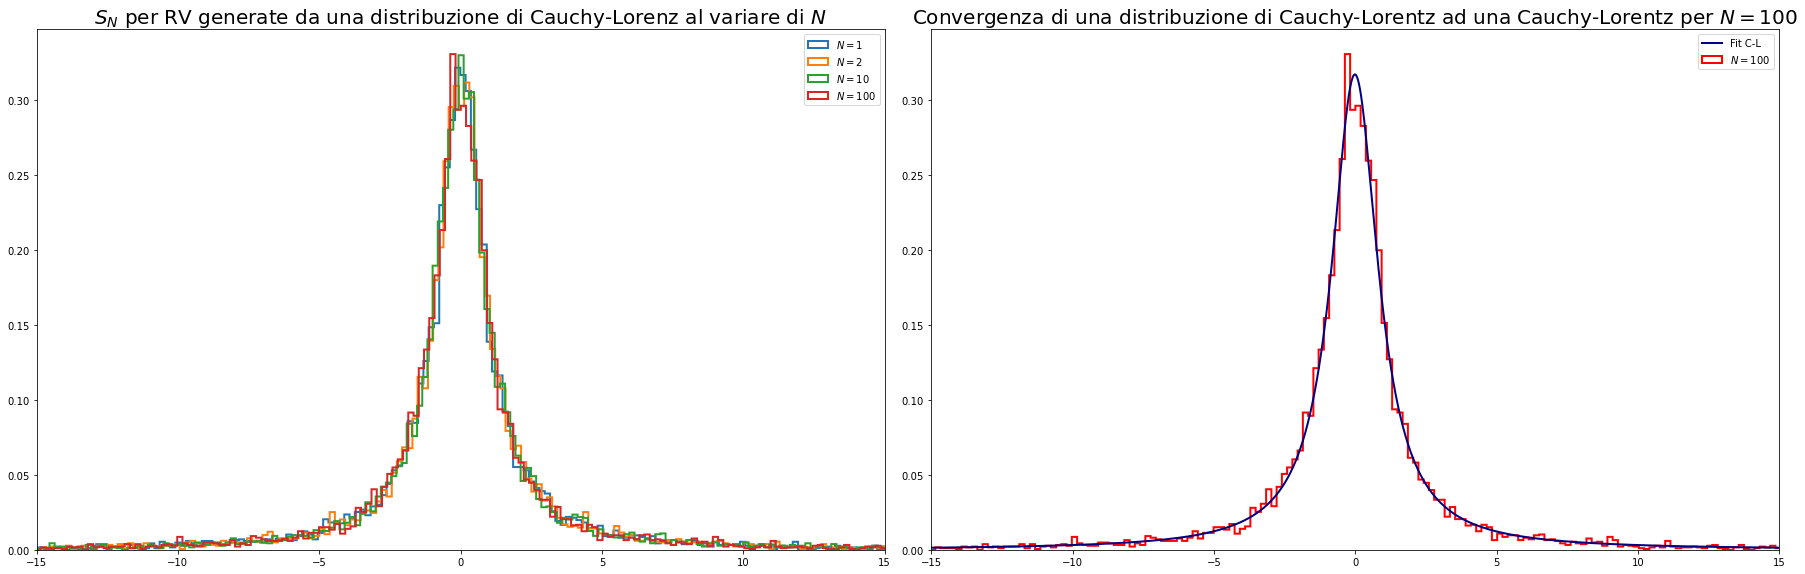

In [11]:
plt.figure(figsize=(25,25))
plt.subplot(2,2,1)
#Distribuzione di Cauchy-Lorentz: Caricamento dei dati relativi a diversi N
lor = np.loadtxt("Esercizio 1.02/Risultati/lor_out.dat", max_rows = 1, unpack=True)
lor2 = np.loadtxt("Esercizio 1.02/Risultati/lor_out.dat", skiprows = 1, max_rows = 1, unpack=True)
lor10 = np.loadtxt("Esercizio 1.02/Risultati/lor_out.dat", skiprows = 2, max_rows = 1, unpack=True)
lor100 = np.loadtxt("Esercizio 1.02/Risultati/lor_out.dat", skiprows = 3, max_rows = 1, unpack=True)

#Distribuzione di Cauchy-Lorentz: Generazione degli istogrammi
plt.hist(lor, bins='auto', density = True, label='$N=1$', histtype = 'step', linewidth=2)
plt.hist(lor2, bins='auto', density = True, label='$N=2$', histtype = 'step', linewidth=2)
plt.hist(lor10, bins='auto', density = True, label='$N=10$', histtype = 'step', linewidth=2)
plt.hist(lor100, bins='auto', density = True, label='$N=100$', histtype = 'step', linewidth=2)
plt.xlim(-15,15)
plt.legend(loc = "best")
plt.title('$S_N$ per RV generate da una distribuzione di Cauchy-Lorenz al variare di $N$', fontsize = 20)

plt.subplot(2,2,2)
#Distribuzione di Cauchy-Lorentz: Istogramma per valore N=100
plt.hist(lor100, bins='auto', density = True, label='$N=100$', histtype = 'step', linewidth=2, color = "red")
plt.xlim(-15,15)
plt.legend(loc = "best")
plt.title('Convergenza di una distribuzione di Cauchy-Lorentz ad una Cauchy-Lorentz per $N=100$', fontsize = 20)
#Fit di Cauchy-Lorentz
x_ticks = plt.xticks() [0]
xmin = min(x_ticks)
xmax = max(x_ticks)
data = np.linspace(xmin, xmax, 10000)
mu, gamma = stats.cauchy.fit(lor100)
fit = stats.cauchy.pdf(data, mu, gamma)
plt.plot(data, fit, linewidth = 2, color = "navy", label = "Fit C-L")
plt.legend(loc="best")
print("Parametri del fit di Cauchy-Lorenz per una distribuzione di Cauchy-Lorenz con N=100:")
print("mu = ", mu)
print("gamma = ", gamma)

plt.tight_layout()
plt.subplots_adjust(top=0.7,hspace=0.4)
plt.show()

### Esercizio 1.03: stima di $\pi$ tramite simulazione dell'esperimento di Buffon

#### <a href="https://en.wikipedia.org/wiki/Buffon%27s_needle_problem"> Esperimento di Buffon </a>

Dato un ago di lunghezza $L$ ed un piano con linee parallele di distanza $d$, ci si chiede qual è la probabilità che, lanciando l'ago in modo casuale sul piano, esso intersechi una linea.
Definiamo $x$ come la distanza del centro dell'ago alla linea parallela più vicina e $\theta$ come l'angolo acuto tra l'ago ed una delle linee parallele. 
- $x=0$ rappresenta un ago centrato sulla linea
- $x = \frac{d}{2}$ rappresenta un ago che giace nel mezzo tra due linee parallele
- $\theta = 0$ rappresenta un ago parallelo alle linee
- $\theta = \frac{\pi}{2}$ rappresenta un ago perpendicolare alle linee

<img src="buffonnew.png" alt="buffon" width="500" heigth="500" />

Le distribuzioni di probabilità per la distanza $x$ e per l'angolo $\theta$ sono date da

$$ p(x) = \begin{cases}
\frac{2}{d} \quad 0 \leq x \leq \frac{d}{2} \\
 0 \quad altrimenti 
 \end{cases}$$
 
 $$p(\theta) = \begin{cases}
\frac{2}{\pi} \quad 0 \leq \theta \leq \frac{\pi}{2} \\
 0 \quad altrimenti 
 \end{cases}$$
 
 La distribuzione di probabilità congiunta per le due variabili è allora data da
 
 $$p(x, \theta) = \begin{cases}
\frac{4}{d\pi} \quad 0 \leq x \leq \frac{d}{2}, \quad  0 \leq \theta \leq \frac{\pi}{2} \\
 0 \quad altrimenti 
 \end{cases}$$
 
 L'ago interseca la linea quando $x \leq \frac{L}{2}\sin(\theta)$. La probabilità che l'ago intersechi la linea è data da
 
 $$ P = \int_{\theta = 0}^{\frac{\pi}{2}} \int_{x = 0}^{\frac{L}{2}\sin(\theta)} \frac{4}{d\pi} dx d\theta = \frac{2L}{\pi d}$$

#### Esercizio 1.03
Grazie all'esperimento di Buffon si può dunque stimare il valore di $\pi$:

$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$

Implementando nel generatore di numeri casuali la possibilità di campionare un angolo $\theta$ tramite metodo del rigetto (senza dunque utilizzare il valore di $\pi$), si valuta il successo $N_{hit}$ quando la distanza $x$ tra il centro dell'ago e la sbarra è minore o uguale alla metà della lunghezza totale dell'ago per il seno dell'angolo relativo alla sua inclinazione. Dunque, campionando x da una distribuzione uniforme e scegliendo $L = 1$, questo avviene quando $x \leq \frac{1}{2} \sin(\theta)$. 

Valutando dunque il valore di $\pi$ e della sua incertezza con il metodo a blocchi si ottiene una convergenza al valore esatto $\pi \simeq 3.14159$ entro $1 \sigma$.

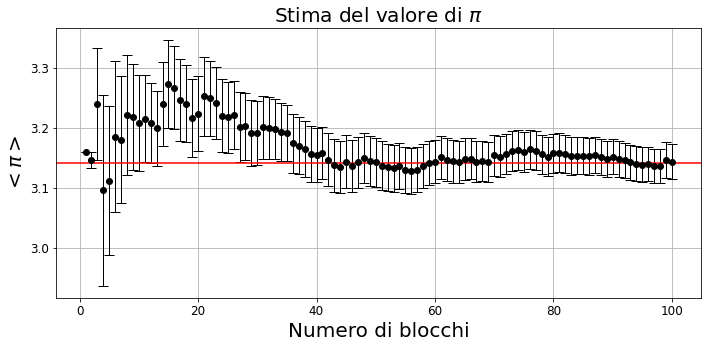

In [35]:
#Plot della stima del valore di pi
plt.figure(figsize=(10,5))
M, cum_pi, std = np.loadtxt("Esercizio 1.03/outpi.dat", usecols=(0,1,2), unpack=True)
plt.errorbar(M,cum_pi,yerr=std, fmt = "ko", capsize = 5, elinewidth = 1)
plt.axhline(y=3.14159,color="red")
plt.xlabel("Numero di blocchi", fontsize = 20)
plt.ylabel("$<\pi>$", fontsize = 20)
plt.title("Stima del valore di $\pi$", fontsize = 20)
plt.grid(True)
plt.tight_layout()
plt.show()